In [1]:
import os
import numpy as np
import networkx as nx
import pandas as pd
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_dir = "../data"
os.listdir(data_dir)

['bus_stops_wszone.dbf',
 'bus_stops_wszone.shp',
 'net_202001_15.net',
 'OD_bus',
 'net_202001_05.net',
 'net_202001_06.net',
 'origin_destination_train_201912.csv.xz',
 'train_station_wszone.prj',
 'origin_destination_train_202001.csv.xz',
 'train_station_wszone.dbf',
 'OD_202001_weekend.csv.xz',
 'net_202001_22.net',
 'subzone_centroid.csv',
 'OD_201912_weekday.csv.xz',
 'origin_destination_bus_201911.csv.xz',
 'net_202001_19.net',
 'net_202001_18.net',
 'train_station_wszone.cpg',
 'OD_PT',
 'train_station_wszone.shx',
 'net_202001_10.net',
 'OD_201911_weekend.csv.xz',
 'origin_destination_train_201911.csv.xz',
 'net_202001_weekend.net',
 'subzone_centroid_pos.json',
 'net_202001_21.net',
 'origin_destination_bus_202001.csv.xz',
 'OD_201912_weekend.csv.xz',
 'net_202001_07.net',
 'origin_destination_bus_201912.csv.xz',
 'net_202001_23.net',
 'region-2014',
 'train_station_wszone.shp',
 'net_202001_weekday.net',
 'net_202001_16.net',
 'OD_train',
 'bus_stops_wszone.shx',
 'OD_202001

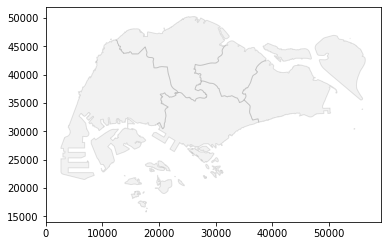

In [4]:
os.listdir("../data")
region = gpd.read_file("../data/region-2014/MP14_REGION_WEB_PL.shp")
region.plot(color="grey", edgecolor="k", alpha=0.1)

In [5]:
with open(os.path.join("../data", 'subzone_centroid_pos.json'), 'r') as fread:
    pos = json.load(fread)
pos["MARINA SOUTH"]

[31595.83574613999, 29220.18737674884]

In [6]:
day = "weekday" # "weekend"
fp = os.path.join(data_dir, "net_202001_{}.net".format(day))
dg1 = nx.read_pajek(fp)
dg1.number_of_nodes(), dg1.number_of_edges()

(303, 30043)

In [7]:
dg1b = nx.DiGraph()
for u,v,d in dg1.edges(data=True):
    dg1b.add_edge(u, v, weight=1./d["weight"])

dg1b.number_of_nodes(), dg1b.number_of_edges()

(303, 30043)

In [47]:
for u,v,d in dg1b.edges(data=True):
    print(d["weight"])
    break

3.6743092298647855e-06


In [48]:
closeness = nx.closeness_centrality(dg1b, distance="weight")
closeness

{'SENOKO NORTH': 88684.9591108608,
 'YISHUN CENTRAL': 106756.7036301909,
 'SEMBAWANG EAST': 94086.50138297224,
 'WOODLANDS WEST': 112893.9023180844,
 'THE WHARVES': 69559.57573251927,
 'SEMBAWANG SPRINGS': 88152.12007654052,
 'ADMIRALTY': 93628.50742544216,
 'SPRINGLEAF': 57830.33766527145,
 'YISHUN WEST': 108392.22286161958,
 'SENOKO WEST': 98809.09175036452,
 'TAGORE': 76775.89746532621,
 'SEMBAWANG STRAITS': 64734.89727703523,
 'KHATIB': 102682.7233683519,
 'NORTHLAND': 105750.05599131147,
 'WOODLANDS REGIONAL CENTRE': 116586.95404578773,
 'SENOKO SOUTH': 103682.51661751089,
 'SHANGRI-LA': 89013.68661313887,
 'ANG MO KIO TOWN CENTRE': 98109.89113971165,
 'GREENWOOD PARK': 96528.04149905528,
 'KEBUN BAHRU': 94935.66856897241,
 'SEMBAWANG HILLS': 68875.18767789444,
 'SEMBAWANG CENTRAL': 104136.21945450075,
 'HOLLAND ROAD': 95223.51075413471,
 'YIO CHU KANG': 91922.22466798151,
 'SUNGEI ROAD': 53402.55208587644,
 'BALESTIER': 107689.36227910475,
 'BUKIT BATOK CENTRAL': 93019.0240134658

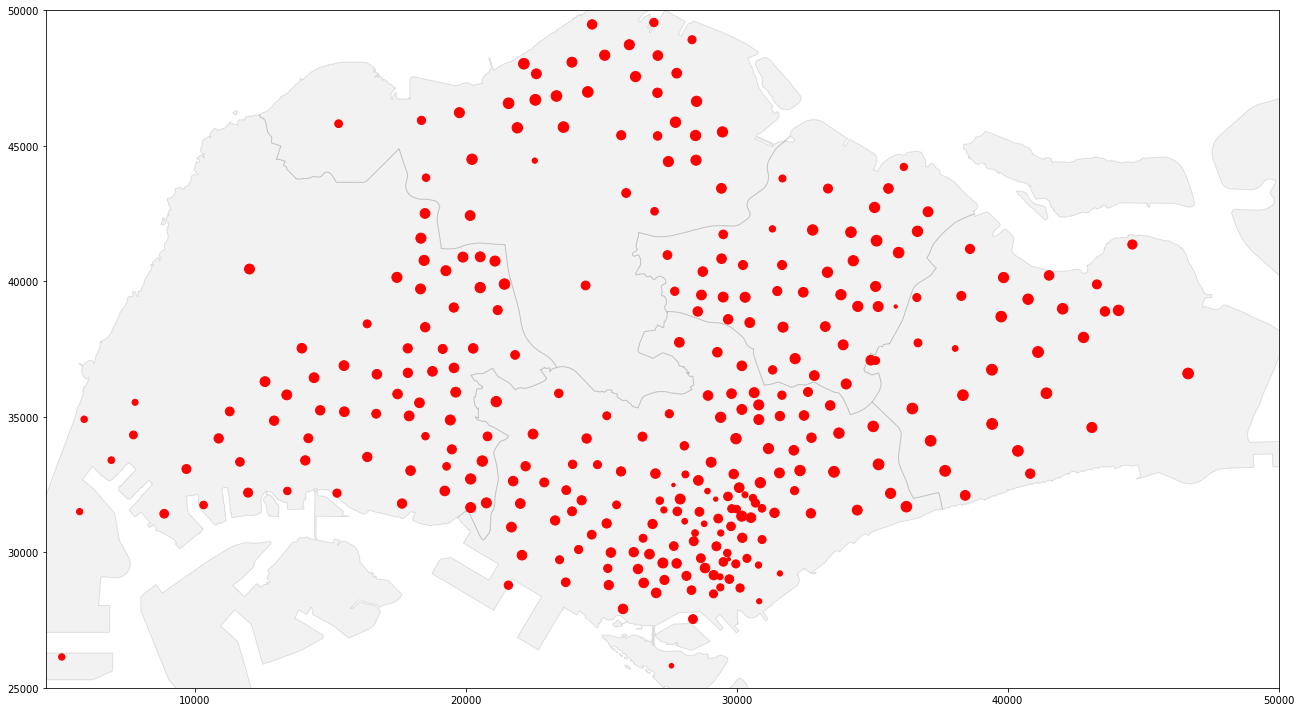

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_aspect("equal")
region.plot(ax=ax, color="grey", edgecolor="k", alpha=0.1)

cs = [ closeness[n]/1000 for n in dg1b.nodes() ]
nx.draw_networkx_nodes(dg1b, pos=pos, node_size=cs, ax=ax)
#nx.draw_networkx_edges(dg1, pos=pos, ax=ax)

ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
plt.tight_layout()

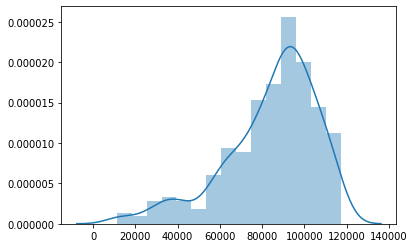

In [51]:
sns.distplot( list(closeness.values()) )